In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Extracing features from text file to list

features = []
with open(r'C:\Users\adity\har\features.txt') as f:
    for line in f:
        currlabel = line.split()[1]
        print(f'{currlabel} is appending')
        features.append(currlabel)

print(features)

tBodyAcc-mean()-X is appending
tBodyAcc-mean()-Y is appending
tBodyAcc-mean()-Z is appending
tBodyAcc-std()-X is appending
tBodyAcc-std()-Y is appending
tBodyAcc-std()-Z is appending
tBodyAcc-mad()-X is appending
tBodyAcc-mad()-Y is appending
tBodyAcc-mad()-Z is appending
tBodyAcc-max()-X is appending
tBodyAcc-max()-Y is appending
tBodyAcc-max()-Z is appending
tBodyAcc-min()-X is appending
tBodyAcc-min()-Y is appending
tBodyAcc-min()-Z is appending
tBodyAcc-sma() is appending
tBodyAcc-energy()-X is appending
tBodyAcc-energy()-Y is appending
tBodyAcc-energy()-Z is appending
tBodyAcc-iqr()-X is appending
tBodyAcc-iqr()-Y is appending
tBodyAcc-iqr()-Z is appending
tBodyAcc-entropy()-X is appending
tBodyAcc-entropy()-Y is appending
tBodyAcc-entropy()-Z is appending
tBodyAcc-arCoeff()-X,1 is appending
tBodyAcc-arCoeff()-X,2 is appending
tBodyAcc-arCoeff()-X,3 is appending
tBodyAcc-arCoeff()-X,4 is appending
tBodyAcc-arCoeff()-Y,1 is appending
tBodyAcc-arCoeff()-Y,2 is appending
tBodyAcc-arC

In [3]:
#Just to verify with some samples
print(features[0:6])

['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z']


In [4]:
#Making dataframe of training set

traindf = pd.read_csv(r'C:\Users\adity\har\train\X_train.txt', delim_whitespace=True, header=None)
traindf.columns = [features]
#adding new column of subject id , to which subject[1-30] data is associated with. 
traindf['subjectid'] = pd.read_csv(r'C:\Users\adity\har\train\subject_train.txt', header=None)
#adding new column of activity from reding y_train file 
traindf['activity'] = pd.read_csv(r'C:\Users\adity\har\train\y_train.txt', header=None)

#Converting labels to designated numerical labels (kind of label encoding)
activity = np.array(traindf.loc[:,"activity"])
activityname = []

for i in range(len(activity)):
    if activity[i] == 1:
        activityname.append('WALKING')
    elif activity[i] == 2:
        activityname.append('WALKING_UPSTAIRS')
    elif activity[i] == 3:
        activityname.append('WALKING_DOWNSTAIRS')
    elif activity[i] == 4:
        activityname.append('SITTING')
    elif activity[i] == 5:
        activityname.append('STANDING')
    elif activity[i] == 6:
        activityname.append('LAYING')

traindf['activityname'] = np.array(activityname)

C:\Users\adity\AppData\Local\Temp\ipykernel_19816\1540579168.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  traindf = pd.read_csv(r'C:\Users\adity\har\train\X_train.txt', delim_whitespace=True, header=None)


In [5]:
#just to verify whether we got right mapping for activity labels
print(traindf.loc[:,['activity','activityname']])

     activity      activityname
0           5          STANDING
1           5          STANDING
2           5          STANDING
3           5          STANDING
4           5          STANDING
...       ...               ...
7347        2  WALKING_UPSTAIRS
7348        2  WALKING_UPSTAIRS
7349        2  WALKING_UPSTAIRS
7350        2  WALKING_UPSTAIRS
7351        2  WALKING_UPSTAIRS

[7352 rows x 2 columns]


In [6]:
traindf.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subjectid,activity,activityname
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING


In [7]:
#Rows & Columns in Dataframe 
traindf.shape

(7352, 564)

In [8]:
traindf.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Data columns (total 564 columns):
 #    Column                                   Dtype  
---   ------                                   -----  
 0    (tBodyAcc-mean()-X,)                     float64
 1    (tBodyAcc-mean()-Y,)                     float64
 2    (tBodyAcc-mean()-Z,)                     float64
 3    (tBodyAcc-std()-X,)                      float64
 4    (tBodyAcc-std()-Y,)                      float64
 5    (tBodyAcc-std()-Z,)                      float64
 6    (tBodyAcc-mad()-X,)                      float64
 7    (tBodyAcc-mad()-Y,)                      float64
 8    (tBodyAcc-mad()-Z,)                      float64
 9    (tBodyAcc-max()-X,)                      float64
 10   (tBodyAcc-max()-Y,)                      float64
 11   (tBodyAcc-max()-Z,)                      float64
 12   (tBodyAcc-min()-X,)                      float64
 13   (tBodyAcc-min()-Y,)                      float64
 14   (tBody

In [9]:
traindf.describe(include='all')

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subjectid,activity,activityname
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LAYING
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1407
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085,3.643362,NaN
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143,1.744802,NaN
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,NaN
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000,2.000000,NaN
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000,4.000000,NaN
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000,5.000000,NaN


In [10]:
#Exploring null values
print(traindf.isna().sum().sum())

0


In [11]:
#NOW WORKING ON TEST DATA--> Creating Data Frame of Test data

In [12]:
testdf = pd.read_csv(r'C:\Users\adity\har\test\X_test.txt', delim_whitespace=True, header=None)
testdf.columns = [features]
#adding new column of subject id , to which subject[1-30] data is associated with. 
testdf['subjectid'] = pd.read_csv(r'C:\Users\adity\har\test\subject_test.txt', header=None)
#adding new column of activity from reding y_train file 
testdf['activity'] = pd.read_csv(r'C:\Users\adity\har\test\y_test.txt', header=None)

#Converting labels to designated numerical labels (kind of label encoding)
activity = np.array(testdf.loc[:,"activity"])
activityname = []

for i in range(len(activity)):
    if activity[i] == 1:
        activityname.append('WALKING')
    elif activity[i] == 2:
        activityname.append('WALKING_UPSTAIRS')
    elif activity[i] == 3:
        activityname.append('WALKING_DOWNSTAIRS')
    elif activity[i] == 4:
        activityname.append('SITTING')
    elif activity[i] == 5:
        activityname.append('STANDING')
    elif activity[i] == 6:
        activityname.append('LAYING')

testdf['activityname'] = np.array(activityname)

C:\Users\adity\AppData\Local\Temp\ipykernel_19816\489421259.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  testdf = pd.read_csv(r'C:\Users\adity\har\test\X_test.txt', delim_whitespace=True, header=None)


In [13]:
testdf.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subjectid,activity,activityname
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,5,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,5,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,5,STANDING


In [14]:
testdf.shape

(2947, 564)

In [15]:
testdf.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Data columns (total 564 columns):
 #    Column                                   Dtype  
---   ------                                   -----  
 0    (tBodyAcc-mean()-X,)                     float64
 1    (tBodyAcc-mean()-Y,)                     float64
 2    (tBodyAcc-mean()-Z,)                     float64
 3    (tBodyAcc-std()-X,)                      float64
 4    (tBodyAcc-std()-Y,)                      float64
 5    (tBodyAcc-std()-Z,)                      float64
 6    (tBodyAcc-mad()-X,)                      float64
 7    (tBodyAcc-mad()-Y,)                      float64
 8    (tBodyAcc-mad()-Z,)                      float64
 9    (tBodyAcc-max()-X,)                      float64
 10   (tBodyAcc-max()-Y,)                      float64
 11   (tBodyAcc-max()-Z,)                      float64
 12   (tBodyAcc-min()-X,)                      float64
 13   (tBodyAcc-min()-Y,)                      float64
 14   (tBody

In [16]:
testdf.describe(include='all')

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subjectid,activity,activityname
count,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,...,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LAYING
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,537
mean,0.273996,-0.017863,-0.108386,-0.613635,-0.508330,-0.633797,-0.641278,-0.522676,-0.637038,-0.462063,...,0.005264,0.003799,0.040029,-0.017298,-0.513923,0.074886,-0.048720,12.986427,3.577876,NaN
std,0.060570,0.025745,0.042747,0.412597,0.494269,0.362699,0.385199,0.479899,0.357753,0.523916,...,0.336147,0.445077,0.634989,0.501311,0.509205,0.324300,0.241467,6.950984,1.740348,NaN
min,-0.592004,-0.362884,-0.576184,-0.999606,-1.000000,-0.998955,-0.999417,-0.999914,-0.998899,-0.952357,...,-1.000000,-0.993402,-0.998898,-0.991096,-0.984195,-0.913704,-0.949228,2.000000,1.000000,NaN
25%,0.262075,-0.024961,-0.121162,-0.990914,-0.973664,-0.976122,-0.992333,-0.974131,-0.975352,-0.934447,...,-0.130541,-0.282600,-0.518924,-0.428375,-0.829722,0.022140,-0.098485,9.000000,2.000000,NaN
50%,0.277113,-0.016967,-0.108458,-0.931214,-0.790972,-0.827534,-0.937664,-0.799907,-0.817005,-0.852659,...,0.005188,0.006767,0.047113,-0.026726,-0.729648,0.181563,-0.010671,12.000000,4.000000,NaN
75%,0.288097,-0.010143,-0.097123,-0.267395,-0.105919,-0.311432,-0.321719,-0.133488,-0.322771,-0.009965,...,0.146200,0.288113,0.622151,0.394387,-0.545939,0.260252,0.092373,18.000000,5.000000,NaN


In [17]:
#Null values in test set
testdf.isna().sum().sum()

0

In [18]:
##EDA

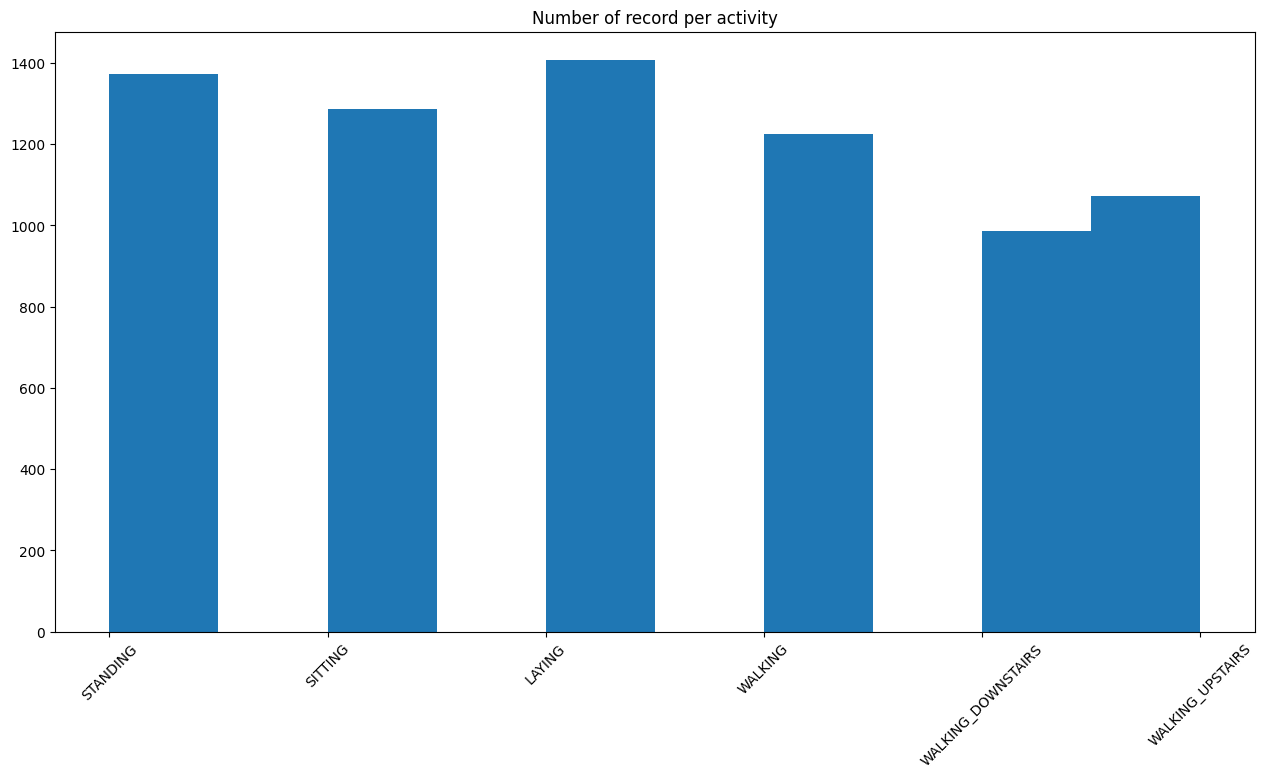

In [19]:
#Check for Imbalance data wrt target column (Y-TRAIN)
fig = plt.figure(figsize=(12,6))
ax = fig.add_axes([0,0,1,1])
plt.title("Number of record per activity")
plt.hist(traindf['activityname'])
plt.ylabel = 'Number of records'
plt.xlabel =''
plt.xticks(rotation=45)
plt.show()

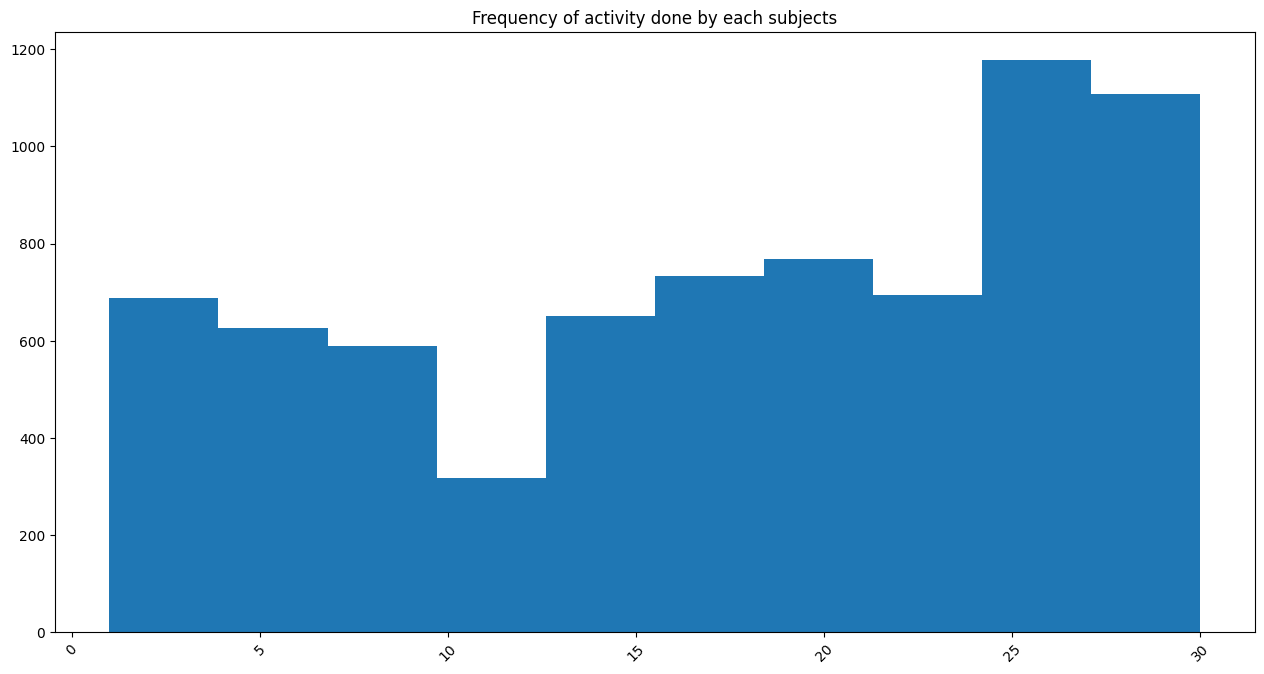

In [20]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_axes([0,0,1,1])
plt.title("Frequency of activity done by each subjects")
plt.hist(traindf['subjectid'])
plt.ylabel = 'Frequency'
plt.xlabel =''
plt.xticks(rotation=45)
plt.show()

In [21]:
#Remove special characters from feature names
li = traindf.columns
#print(li[-1][0])
newcols = []
for i in range(len(li)):
    temp = str(li[i][0])
    temp = temp.replace('[','')
    temp = temp.replace(']','')
    temp = temp.replace('(','')
    temp = temp.replace(')','')
    temp = temp.replace('-','')
    temp = temp.replace(',','')
    print(f'appending {temp}') #just to verify
    newcols.append(temp)

appending tBodyAccmeanX
appending tBodyAccmeanY
appending tBodyAccmeanZ
appending tBodyAccstdX
appending tBodyAccstdY
appending tBodyAccstdZ
appending tBodyAccmadX
appending tBodyAccmadY
appending tBodyAccmadZ
appending tBodyAccmaxX
appending tBodyAccmaxY
appending tBodyAccmaxZ
appending tBodyAccminX
appending tBodyAccminY
appending tBodyAccminZ
appending tBodyAccsma
appending tBodyAccenergyX
appending tBodyAccenergyY
appending tBodyAccenergyZ
appending tBodyAcciqrX
appending tBodyAcciqrY
appending tBodyAcciqrZ
appending tBodyAccentropyX
appending tBodyAccentropyY
appending tBodyAccentropyZ
appending tBodyAccarCoeffX1
appending tBodyAccarCoeffX2
appending tBodyAccarCoeffX3
appending tBodyAccarCoeffX4
appending tBodyAccarCoeffY1
appending tBodyAccarCoeffY2
appending tBodyAccarCoeffY3
appending tBodyAccarCoeffY4
appending tBodyAccarCoeffZ1
appending tBodyAccarCoeffZ2
appending tBodyAccarCoeffZ3
appending tBodyAccarCoeffZ4
appending tBodyAcccorrelationXY
appending tBodyAcccorrelationXZ
ap

In [22]:
traindf.columns = [newcols]
traindf.columns

MultiIndex([(                    'tBodyAccmeanX',),
            (                    'tBodyAccmeanY',),
            (                    'tBodyAccmeanZ',),
            (                     'tBodyAccstdX',),
            (                     'tBodyAccstdY',),
            (                     'tBodyAccstdZ',),
            (                     'tBodyAccmadX',),
            (                     'tBodyAccmadY',),
            (                     'tBodyAccmadZ',),
            (                     'tBodyAccmaxX',),
            ...
            (         'angletBodyAccMeangravity',),
            ( 'angletBodyAccJerkMeangravityMean',),
            (    'angletBodyGyroMeangravityMean',),
            ('angletBodyGyroJerkMeangravityMean',),
            (                'angleXgravityMean',),
            (                'angleYgravityMean',),
            (                'angleZgravityMean',),
            (                        'subjectid',),
            (                         'activity'

In [23]:
testdf.columns = [newcols]
testdf.columns

MultiIndex([(                    'tBodyAccmeanX',),
            (                    'tBodyAccmeanY',),
            (                    'tBodyAccmeanZ',),
            (                     'tBodyAccstdX',),
            (                     'tBodyAccstdY',),
            (                     'tBodyAccstdZ',),
            (                     'tBodyAccmadX',),
            (                     'tBodyAccmadY',),
            (                     'tBodyAccmadZ',),
            (                     'tBodyAccmaxX',),
            ...
            (         'angletBodyAccMeangravity',),
            ( 'angletBodyAccJerkMeangravityMean',),
            (    'angletBodyGyroMeangravityMean',),
            ('angletBodyGyroJerkMeangravityMean',),
            (                'angleXgravityMean',),
            (                'angleYgravityMean',),
            (                'angleZgravityMean',),
            (                        'subjectid',),
            (                         'activity'

In [ ]:
#Compile & save Train/Test DF to CSV files

traindf.to_csv(r'C:\Users\adity\har', index=False)
testdf.to_csv(r'C:\Users\adity\har', index=False)

In [25]:
xtrain = (traindf.drop(['subjectid','activity','activityname'], axis=1)).values
ytrain = traindf['activity'].values

xtest = (testdf.drop(['subjectid','activity','activityname'], axis=1)).values
ytest = testdf['activity'].values

In [26]:
print(xtrain)
print(xtrain.shape)

[[ 0.28858451 -0.02029417 -0.13290514 ... -0.84124676  0.17994061
  -0.05862692]
 [ 0.27841883 -0.01641057 -0.12352019 ... -0.8447876   0.18028889
  -0.05431672]
 [ 0.27965306 -0.01946716 -0.11346169 ... -0.84893347  0.18063731
  -0.04911782]
 ...
 [ 0.27338737 -0.01701062 -0.04502183 ... -0.77913261  0.24914484
   0.04081119]
 [ 0.28965416 -0.01884304 -0.15828059 ... -0.78518142  0.24643223
   0.02533948]
 [ 0.35150347 -0.01242312 -0.20386717 ... -0.78326693  0.24680852
   0.03669484]]
(7352, 561)


In [27]:
print(ytrain)
print(ytrain.shape)

[[5]
 [5]
 [5]
 ...
 [2]
 [2]
 [2]]
(7352, 1)


In [28]:
print(xtest)
print(xtest.shape)

[[ 0.25717778 -0.02328523 -0.01465376 ... -0.72000927  0.27680104
  -0.0579783 ]
 [ 0.28602671 -0.01316336 -0.11908252 ... -0.69809082  0.28134292
  -0.08389801]
 [ 0.27548482 -0.02605042 -0.11815167 ... -0.70277146  0.28008303
  -0.0793462 ]
 ...
 [ 0.34996609  0.03007744 -0.11578796 ... -0.65535684  0.27447878
   0.18118355]
 [ 0.23759383  0.01846687 -0.09649893 ... -0.65971859  0.26478161
   0.18756291]
 [ 0.15362719 -0.01843651 -0.13701846 ... -0.66008023  0.26393619
   0.1881034 ]]
(2947, 561)


In [29]:
print(ytest)
print(ytest.shape)

[[5]
 [5]
 [5]
 ...
 [2]
 [2]
 [2]]
(2947, 1)


In [30]:
#logistic regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(multi_class='ovr')
classifier.fit(xtrain, ytrain)

D:\Anaconda\envs\ml\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\envs\ml\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
D:\Anaconda\envs\ml\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

LogisticRegression(multi_class='ovr')

In [31]:
#predict results on testing independent features
ypred = classifier.predict(xtest)
print(ypred)

[5 5 5 ... 2 2 2]


In [32]:
#accuracy of logictic regression
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(ytest, ypred)
print(cm)
acc = accuracy_score(ytest,ypred)
print(f'Accuracy of LOGISTIC REGRESSON {acc*100}%')

[[494   0   2   0   0   0]
 [ 26 445   0   0   0   0]
 [  4   9 407   0   0   0]
 [  0   3   0 437  51   0]
 [  2   0   0  13 517   0]
 [  0   0   0   0   0 537]]
Accuracy of LOGISTIC REGRESSON 96.26739056667797%


In [33]:
#Naive bayes

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(xtrain,ytrain)

D:\Anaconda\envs\ml\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [34]:
#predict results on testing independent features
ypred = classifier.predict(xtest)
print(ypred)

[5 5 5 ... 2 2 2]


In [35]:
#accuracy of naive bayes
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(ytest, ypred)
print(cm)
acc = accuracy_score(ytest,ypred)
print(f'Accuracy of NAIVE BAYES {acc*100}%')

[[416  38  42   0   0   0]
 [  9 451  11   0   0   0]
 [ 80  83 257   0   0   0]
 [  0   7   0 368 111   5]
 [  0  15   0  54 455   8]
 [  0   3   0 211   0 323]]
Accuracy of NAIVE BAYES 77.02748557855446%


In [36]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2)
classifier.fit(xtrain, ytrain)

D:\Anaconda\envs\ml\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [37]:
#predict results on testing independent features
ypred = classifier.predict(xtest)
print(ypred)

[5 5 5 ... 2 2 1]


In [38]:
#accuracy of knn
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(ytest, ypred)
print(cm)
acc = accuracy_score(ytest,ypred)
print(f'Accuracy of KNN {acc*100}%')

[[485   2   9   0   0   0]
 [ 40 424   7   0   0   0]
 [ 45  45 330   0   0   0]
 [  0   3   0 389  99   0]
 [  0   0   0  37 495   0]
 [  0   0   0   2   1 534]]
Accuracy of KNN 90.15948422124194%


In [39]:
#Support Vector Classifier --> SVC (WITH KERNEL TRICK kernel='rbf' for NON LINEARLY SEPERABLE DATA) (NORMAL KERNEL WE SHALL USE kernel='linear' it's for linearly seperable data)
from sklearn.svm import SVC
#radial basis function KERNEL
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(xtrain, ytrain)

D:\Anaconda\envs\ml\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(random_state=0)

In [40]:
#predict results on testing independent features
ypred = classifier.predict(xtest)
print(ypred)

[5 5 5 ... 2 2 2]


In [41]:
#accuracy of svc
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(ytest, ypred)
print(cm)
acc = accuracy_score(ytest,ypred)
print(f'Accuracy of SVC-RBF {acc*100}%')

[[488   5   3   0   0   0]
 [ 20 451   0   0   0   0]
 [ 10  26 384   0   0   0]
 [  0   2   0 438  51   0]
 [  0   0   0  29 503   0]
 [  0   0   0   0   0 537]]
Accuracy of SVC-RBF 95.04580929759076%


In [42]:
#SVC with linear kernel
from sklearn.svm import SVC

classifier = SVC(kernel='linear', random_state=0)
classifier.fit(xtrain, ytrain)

D:\Anaconda\envs\ml\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear', random_state=0)

In [43]:
#predict results on testing independent features
ypred = classifier.predict(xtest)
print(ypred)

[5 5 5 ... 2 2 2]


In [44]:
#accuracy of svc
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(ytest, ypred)
print(cm)
acc = accuracy_score(ytest,ypred)
print(f'Accuracy of SVC-LINEAR {acc*100}%')

[[492   1   3   0   0   0]
 [ 18 451   2   0   0   0]
 [  4   6 410   0   0   0]
 [  0   2   0 435  54   0]
 [  0   0   0  16 516   0]
 [  0   0   0   0   0 537]]
Accuracy of SVC-LINEAR 96.40312181879878%


In [45]:
#Decision Trees Classifier (CART --> Classification & regression trees)
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [46]:
#predict results on testing independent features
ypred = classifier.predict(xtest)
print(ypred)

[5 5 5 ... 2 1 3]


In [47]:
#accuracy of Decision trees
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(ytest, ypred)
print(cm)
acc = accuracy_score(ytest,ypred)
print(f'Accuracy of D-Trees {acc*100}%')

[[459  15  22   0   0   0]
 [ 61 359  51   0   0   0]
 [ 20  51 349   0   0   0]
 [  0   0   0 385 106   0]
 [  0   0   0  73 459   0]
 [  0   0   0   0   0 537]]
Accuracy of D-Trees 86.46080760095012%


In [ ]:
#Gradient Boosted Decision Trees
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier(n_estimators=100, max_depth=3, learning_rate=0.1)
classifier.fit(xtrain,ytrain)

In [ ]:
ypred = classifier.predict(xtest)
ypred

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(ytest, ypred)
print(cm)
acc = accuracy_score(ytest,ypred)
print(f'Accuracy of GDBoost D-Trees {acc*100}%')

In [49]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, max_depth=20)
classifier.fit(xtrain,ytrain)

D:\Anaconda\envs\ml\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=20)

In [50]:
#Predicting results on test set
ypred = classifier.predict(xtest)
ypred

array([5, 5, 5, ..., 2, 2, 1], dtype=int64)

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(ytest, ypred)
print(cm)
acc = accuracy_score(ytest,ypred)
print(f'Accuracy of GDBoost D-Trees {acc*100}%')

[[480   6  10   0   0   0]
 [ 29 436   6   0   0   0]
 [ 24  44 352   0   0   0]
 [  0   0   0 432  59   0]
 [  0   0   0  44 488   0]
 [  0   0   0   0   0 537]]
Accuracy of GDBoost D-Trees 92.46691550729555%


Model : logistic_reg had accuracy of 96.26%
Model : NB had accuracy of 77.02%
Model : KNN had accuracy of 90.15%
Model : SVC-RBF had accuracy of 95.04%
Model : SVC-LIN had accuracy of 96.4%
Model : D-Trees had accuracy of 86.22%
Model : GDBC had accuracy of 93.82%
Model : Random Forest Classifier had accuracy of 92.12%


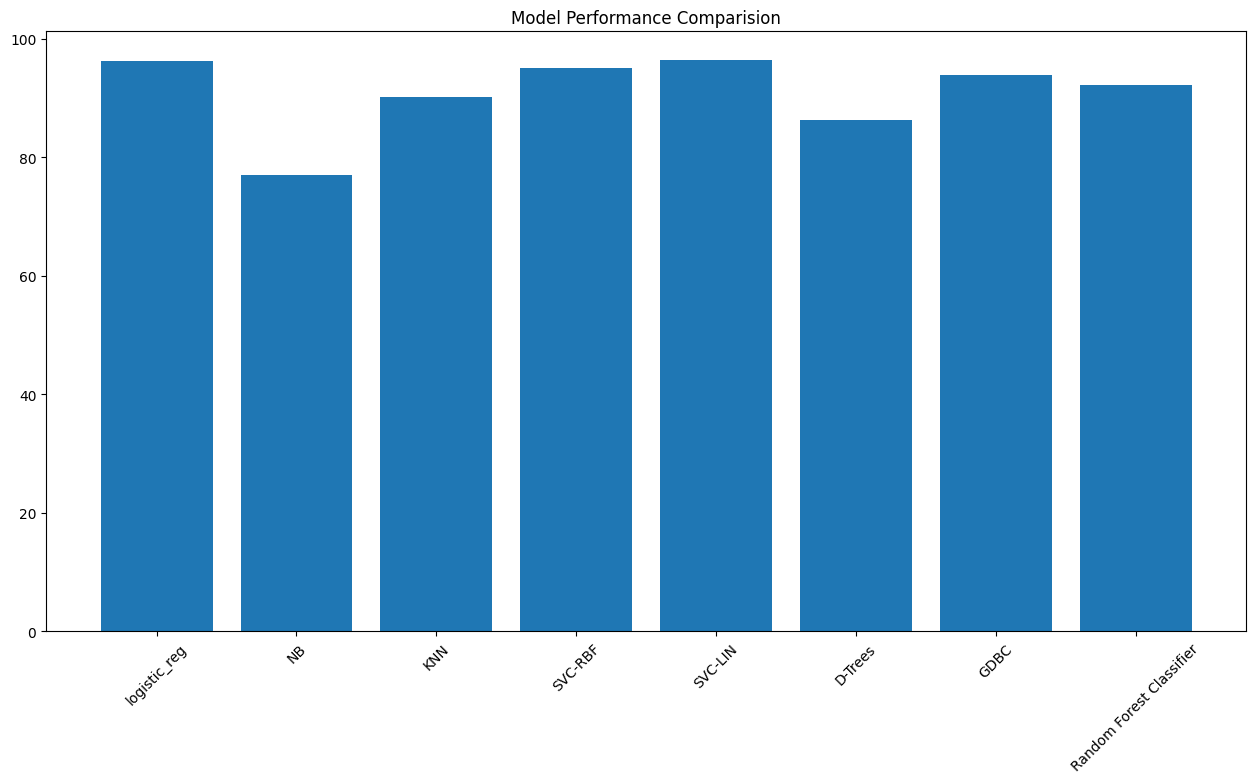

In [52]:
x = ['logistic_reg', 'NB', 'KNN', 'SVC-RBF', 'SVC-LIN','D-Trees', 'GDBC' ,'Random Forest Classifier']
y = [96.26, 77.02, 90.15, 95.04, 96.40, 86.22, 93.82, 92.12]

for i in range(8):
    print(f'Model : {x[i]} had accuracy of {y[i]}%')

fig = plt.figure(figsize=(12,6))
ax = fig.add_axes([0,0,1,1])
plt.title("Model Performance Comparision")
plt.bar(x=x, height=y)
plt.ylabel = 'Accuracy'
plt.xlabel ='Model'
plt.xticks(rotation=45)
plt.show()





In [53]:
#building ann

In [54]:
#verifying shapes & datatype of feature data of xtrain, xtest, ytrain, ytest

In [55]:
print(xtrain.shape)
print(xtrain.dtype)

(7352, 561)
float64


In [56]:
print(ytrain.shape)
print(ytrain.dtype)

(7352, 1)
int64


In [57]:
print(xtest.shape)
print(xtest.dtype)

(2947, 561)
float64


In [58]:
print(ytest.shape)
print(ytest.dtype)

(2947, 1)
int64


In [59]:
#Apply onehot encoding to Ytrain, Ytest coz in ouput later we are have 6 output node for 6 different labels but in ytrain/ytest single column have all lables

In [60]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[ ('encoder', OneHotEncoder(), [0]) ], remainder='passthrough') #It's the column index whivh e want to encode
ytrainenc = ct.fit_transform(ytrain)
ytrainenc

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 7352 stored elements and shape (7352, 6)>

In [61]:
print(ytrainenc.shape)

(7352, 6)


In [62]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[ ('encoder', OneHotEncoder(), [0]) ], remainder='passthrough') #It's the column index whivh e want to encode
ytestenc = ct.fit_transform(ytest)
ytestenc

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2947 stored elements and shape (2947, 6)>

In [63]:
#as we can it's a sparse row , not extact array we want like every row have 6 different olumn represneting 6 lables

In [64]:
#it's the ytrain/ytest we want, not the sparse row
ytrainenc.toarray()

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.]])

In [65]:
#it's the ytrain/ytest we want, not the sparse row
ytestenc.toarray()

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.]])

In [66]:
ytestenc = ytestenc.toarray()
ytrainenc = ytrainenc.toarray()

In [67]:
print(ytestenc.shape)

(2947, 6)


In [68]:
ytrainenc.dtype

dtype('float64')

In [69]:
ytestenc.dtype

dtype('float64')

In [70]:
xtrain.dtype

dtype('float64')

In [71]:
xtest.dtype

dtype('float64')

In [72]:
'''
xtrain=xtrain.astype('float64')
xtest=xtest.astype('float64')
ytrain=ytrain.astype('float64')
ytest=ytest.astype('float64')'''

"\nxtrain=xtrain.astype('float64')\nxtest=xtest.astype('float64')\nytrain=ytrain.astype('float64')\nytest=ytest.astype('float64')"

In [73]:
print(ytestenc.shape)
print(ytestenc.dtype)

(2947, 6)
float64


In [74]:
print(ytrainenc.shape)
print(ytrainenc.dtype)

(7352, 6)
float64


In [75]:
import tensorflow as tf

In [76]:
ann = tf.keras.models.Sequential()

#input layer
ann.add(tf.keras.layers.Dense(units=64, activation='relu', input_dim=561))
ann.add(tf.keras.layers.Dropout(0.5))

#hidden layer
ann.add(tf.keras.layers.Dense(units=128, activation='relu'))
#ann.add(tf.keras.layers.Dropout(0.5))

ann.add(tf.keras.layers.Dense(units=128, activation='relu'))
ann.add(tf.keras.layers.Dropout(0.5))

ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
#ann.add(tf.keras.layers.Dropout(0.5))

ann.add(tf.keras.layers.Dense(units=32, activation='relu'))
ann.add(tf.keras.layers.Dropout(0.5))

#output layer
ann.add(tf.keras.layers.Dense(units=6, activation='sigmoid'))

D:\Anaconda\envs\ml\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [77]:
ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │          35,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 6)                   │             198 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71,334 (278.65 KB)

 Trainable params: 71,334 (278.65 KB)

 Non-trainable params: 0 (0.00 B)

In [78]:
ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [79]:
hist = ann.fit(xtrain, ytrainenc, batch_size=32, epochs=100, validation_data=(xtest,ytestenc))

Epoch 1/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2706 - loss: 1.6271 - val_accuracy: 0.6525 - val_loss: 0.7065
Epoch 2/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5817 - loss: 0.8854 - val_accuracy: 0.8422 - val_loss: 0.5422
Epoch 3/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6722 - loss: 0.6827 - val_accuracy: 0.7872 - val_loss: 0.4554
Epoch 4/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7137 - loss: 0.6207 - val_accuracy: 0.7998 - val_loss: 0.3969
Epoch 5/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7494 - loss: 0.5169 - val_accuracy: 0.7964 - val_loss: 0.3825
Epoch 6/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7117 - loss: 0.5681 - val_accuracy: 0.8090 - val_loss: 0.3529
Epoch 7/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7361 - loss: 0.5404 - val_accuracy: 0.8368 - val_loss: 0.3392
Epoch 8/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7581 - loss: 0.4763 - val_accu

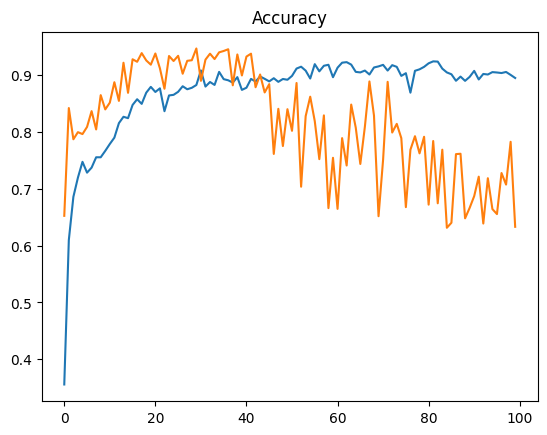

In [80]:
plt.plot(hist.history['accuracy'], label='training accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.show()

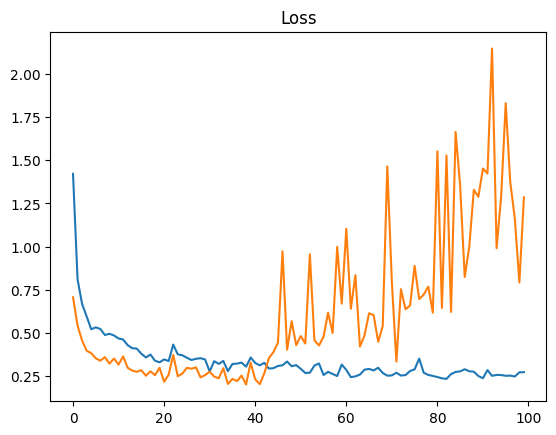

In [81]:
plt.plot(hist.history['loss'], label='val loss')
plt.plot(hist.history['val_loss'], label='validationn loss')
plt.title('Loss')
plt.show()

In [82]:
ann.evaluate(xtest,ytestenc)

93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step - accuracy: 0.6525 - loss: 1.2134


[1.2848032712936401, 0.6331862807273865]

In [83]:
ypred = ann.predict(xtest)
ypred

93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[3.27420537e-07, 3.43431680e-07, 1.36175468e-13, 6.45617187e-01,
        9.98721361e-01, 1.43820088e-07],
       [3.56354377e-08, 3.78072507e-08, 1.68547126e-15, 6.87802076e-01,
        9.99537110e-01, 1.03811315e-08],
       [6.26245011e-08, 6.44488338e-08, 4.84784061e-15, 6.79731369e-01,
        9.99407828e-01, 1.95610550e-08],
       ...,
       [2.06678826e-02, 9.63751793e-01, 1.48807421e-01, 1.42380915e-04,
        1.82093470e-06, 3.67683882e-04],
       [1.60494953e-01, 8.69872630e-01, 1.42988667e-01, 2.29543680e-03,
        1.63392731e-04, 5.05757937e-03],
       [6.87149286e-01, 5.91213048e-01, 1.35461703e-01, 4.40414101e-02,
        1.79865099e-02, 9.17814374e-02]], dtype=float32)

In [84]:
ypred.shape

(2947, 6)

In [90]:
#RNN LSTM
lstm = tf.keras.models.Sequential()

lstm.add(tf.keras.layers.LSTM(units = 64, input_shape=(561,1))) #input_dim=561 Or input_shape(561,1)
lstm.add(tf.keras.layers.Dropout(0.5))
lstm.add(tf.keras.layers.Dense(units=64, activation='relu'))
lstm.add(tf.keras.layers.Dense(units=6, activation='sigmoid'))

In [94]:
lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # we can also use -->optimizer='rmsprop'

In [95]:
lstm.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 64)                  │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,446 (83.77 KB)

 Trainable params: 21,446 (83.77 KB)

 Non-trainable params: 0 (0.00 B)

In [96]:
lstm.fit(xtrain, ytrainenc, batch_size=32, epochs=100, validation_data=(xtest, ytestenc))

Epoch 1/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 27s 108ms/step - accuracy: 0.2283 - loss: 1.6995 - val_accuracy: 0.1805 - val_loss: 1.7814
Epoch 2/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 26s 111ms/step - accuracy: 0.2224 - loss: 1.7693 - val_accuracy: 0.3281 - val_loss: 1.7171
Epoch 3/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 26s 112ms/step - accuracy: 0.2880 - loss: 1.6236 - val_accuracy: 0.4052 - val_loss: 1.6580
Epoch 4/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 26s 113ms/step - accuracy: 0.4039 - loss: 1.3414 - val_accuracy: 0.5365 - val_loss: 0.9613
Epoch 5/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 25s 110ms/step - accuracy: 0.5117 - loss: 0.9654 - val_accuracy: 0.5911 - val_loss: 0.8342
Epoch 6/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 26s 114ms/step - accuracy: 0.5665 - loss: 0.8679 - val_accuracy: 0.6834 - val_loss: 0.7207
Epoch 7/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 26s 112ms/step - accuracy: 0.6113 - loss: 0.7903 - val_accuracy: 0.7038 - val_loss: 0.6676
Epoch 8/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 26s 115ms/step - accuracy: 0.6601 -

In [97]:
lstm.evaluate(xtest,ytestenc)

93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.8528 - loss: 0.3985


[0.38514095544815063, 0.8608754873275757]